3.1 全1张量或全0张量

In [55]:
import tensorflow as tf

x = tf.ones(shape=(2,1))
print(x)

'''
y = tf.ones(3, 3)
z = tf.ones((3, 3))

print(y)
print(z)
'''

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


'\ny = tf.ones(3, 3)\nz = tf.ones((3, 3))\n\nprint(y)\nprint(z)\n'

In [56]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


3.2 随机张量

In [57]:
# 均值为0，标准差为1的正态分布
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.32365417]
 [ 0.8427681 ]
 [-0.06695432]], shape=(3, 1), dtype=float32)


In [58]:
# 从0和1之间的均匀分布中抽取的随机张量
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.53528965]
 [0.91174424]
 [0.4554273 ]], shape=(3, 1), dtype=float32)


3.3 Numpy数组是可赋值的

In [59]:
import numpy as np

x = np.ones(shape=(2, 2))
x[0, 0] = 0.

3.4 TensorFlow张量是不可赋值的

In [60]:
'''
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.
'''

'\nx = tf.ones(shape=(2, 2))\nx[0, 0] = 0.\n'

3.5 创建一个TensorFlow变量

In [61]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-2.190622  ],
       [-0.0948602 ],
       [-0.20578042]], dtype=float32)>


3.6 为TensorFlow变量赋值

In [62]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

3.7 为TensorFlow变量的子集赋值

In [63]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

3.8 使用assign_add()

In [64]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

3.9 一些基本的数学运算

In [65]:
a = tf.ones((2, 2))
b = tf.square(a)  # 求平方
c = tf.sqrt(a)    # 求平方根
d = b + c         # 两个张量（逐元素）相加
e = tf.matmul(a, b) # 计算两个张量的积
e *= d            # 两个张量（逐元素）相乘

3.10 使用GradientTape

In [66]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

3.11 对常数张量输入使用GradientTape

In [67]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

3.12 利用嵌套的梯度带计算二阶梯度

In [68]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 10 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

3.13 在二维平面上随机生成两个类别的点

In [69]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],                # 特定均值
    cov=[[1, 0.5], [0.5, 1]],   # 协方差矩阵
    size=num_samples_per_class  # 1000个二维随机点
)

positive_sample = np.random.multivariate_normal(
    mean=[3, 0],                # 特定均值
    cov=[[1, 0.5], [0.5, 1]],   # 协方差矩阵
    size=num_samples_per_class  # 1000个二维随机点
)

3.14 将两个类别堆叠成一个形状为（2000，2）的数组

In [70]:
inputs = np.vstack((negative_samples, positive_sample)).astype(np.float32)

3.15 生成对应的目标标签(0和1)

In [71]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'), np.ones((num_samples_per_class, 1), dtype='float32')))

3.16 绘制两个点类的图像

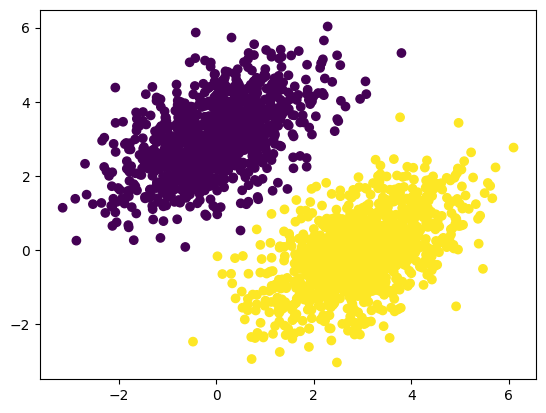

In [72]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

3.17 创建线性分类器的变量

In [73]:
input_dim = 2   # 输入是二维点
output_dim = 1  # 每个样本的输出预测是一个分数值

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

3.18 前向传播函数

In [74]:
def model(inputs):
    return tf.matmul(inputs, W) + b

3.19 均方差损失函数

In [75]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)

    return tf.reduce_mean(per_sample_losses)

3.20 训练步骤函数

In [76]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape () as tape:
        # 在一个梯度带作用域内进行一次前向传播
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    
    # 检索损失相对于权重的梯度
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])

    # 更新权重
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)

    return loss


3.21 批量训练循环

In [77]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.2097
Loss at step 1: 0.5131
Loss at step 2: 0.1811
Loss at step 3: 0.1357
Loss at step 4: 0.1220
Loss at step 5: 0.1126
Loss at step 6: 0.1043
Loss at step 7: 0.0969
Loss at step 8: 0.0901
Loss at step 9: 0.0840
Loss at step 10: 0.0784
Loss at step 11: 0.0734
Loss at step 12: 0.0688
Loss at step 13: 0.0646
Loss at step 14: 0.0608
Loss at step 15: 0.0574
Loss at step 16: 0.0543
Loss at step 17: 0.0514
Loss at step 18: 0.0489
Loss at step 19: 0.0465
Loss at step 20: 0.0444
Loss at step 21: 0.0425
Loss at step 22: 0.0407
Loss at step 23: 0.0391
Loss at step 24: 0.0377
Loss at step 25: 0.0364
Loss at step 26: 0.0352
Loss at step 27: 0.0341
Loss at step 28: 0.0331
Loss at step 29: 0.0322
Loss at step 30: 0.0314
Loss at step 31: 0.0307
Loss at step 32: 0.0300
Loss at step 33: 0.0294
Loss at step 34: 0.0288
Loss at step 35: 0.0283
Loss at step 36: 0.0279
Loss at step 37: 0.0275
Loss at step 38: 0.0271
Loss at step 39: 0.0267


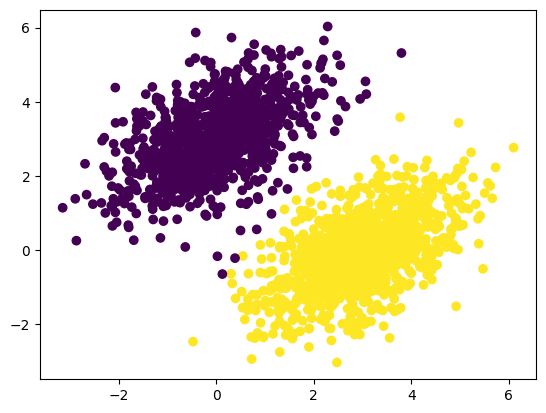

In [78]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

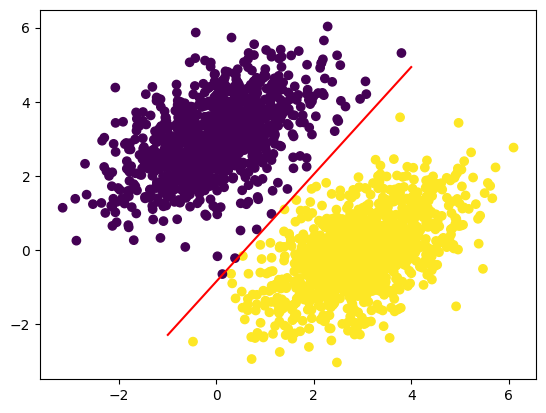

In [79]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

3.22 Dense层的实现：作为Layer的子类

In [80]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    # 在build()方法中创建权重
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,), initializer="zeros")

    # 在call()方法中定义前向传播计算
    def call (self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        
        return y


In [81]:
# 实例化SimpeDense类
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
# 创建一些测试输入
input_tensor = tf.ones(shape=(2, 784))
# 对输入调用层，就像调用函数意义
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


动态构建层

In [82]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [83]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [84]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax"),
])

**编译步骤：配置学习过程**

In [85]:
# 定义一个线性分类器
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",         # 指定优化器
                loss="mean_squared_error", # 指定损失函数：均方差
                metrics=["accuracy"]       # 指定指标列表：精度
    )

In [86]:
# 参数指定为对象实例
model.compile(optimizer=keras.optimizers.RMSprop(),
                loss=keras.losses.MeanSquaredError(),
                metrics=[keras.metrics.BinaryAccuracy()])

**理解fit()方法**

3.23 对NumPy数据调用fit()

In [87]:
history = model.fit(
    inputs,         # 输入样本，一个NumPy数组
    targets,        # 对应的训练目标，一个NumPy数组
    epochs=5,       # 训练循环将对数据迭代5次
    batch_size=128  # 训练循环的批量大小为128
)

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 6.2249 - binary_accuracy: 0.5195
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 5.8441 - binary_accuracy: 0.5205
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 5.5253 - binary_accuracy: 0.5220
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 5.2222 - binary_accuracy: 0.5220
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 4.9307 - binary_accuracy: 0.5225


In [88]:
# 返回一个History对象。这个对象包含history字段，它是一个字典。
history.history

{'loss': [6.22487735748291,
  5.844130992889404,
  5.525301933288574,
  5.222231864929199,
  4.930727481842041],
 'binary_accuracy': [0.5195000171661377,
  0.5205000042915344,
  0.5220000147819519,
  0.5220000147819519,
  0.5224999785423279]}

**监控验证数据上的损失和指标**

3.24 使用`validation_data`参数

In [89]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 3ms/step - loss: 0.1675 - binary_accuracy: 0.9350 - val_loss: 0.0328 - val_binary_accuracy: 0.9933
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0696 - binary_accuracy: 0.9550 - val_loss: 0.0390 - val_binary_accuracy: 0.9950
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0682 - binary_accuracy: 0.9650 - val_loss: 0.1305 - val_binary_accuracy: 0.8550
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0712 - binary_accuracy: 0.9621 - val_loss: 0.0695 - val_binary_accuracy: 0.9650
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0701 - binary_accuracy: 0.9593 - val_loss: 0.0363 - val_binary_accuracy: 0.9950


**推断:在训练后使用模型**

In [90]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 1ms/step
[[-0.49556878]
 [ 0.5109966 ]
 [-0.24143168]
 [ 0.8104465 ]
 [-0.23275366]
 [-0.17981395]
 [ 0.9075089 ]
 [ 0.25215536]
 [ 0.7025648 ]
 [ 0.6284237 ]]
